In [52]:
from __future__ import print_function

import random

import pandas as pd
from tqdm import tqdm
import numpy as np

0
1
2
3


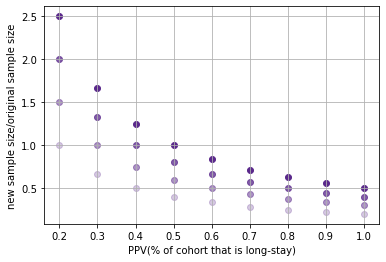

In [8]:
import matplotlib.pyplot as plt
import numpy as np

long_stay_prevalence = [0.2, 0.3, 0.4, 0.5]
for index, lsp in enumerate(long_stay_prevalence):
    x = [i / 100 for i in range(20, 110, 10)]
    y = [lsp / i for i in x]
    plt.scatter(x, y, color= '#5a288b',alpha=0.25 + index * 0.25)

# x = [0.325, 0.45, 0.56, 0.65]
# y = [i/x for i in long_stay_prevalence]
# plt.scatter(x, y, color= '#5a288b',alpha=0.4 + index * 0.2)
plt.grid(axis='both')
plt.xlabel('PPV(% of cohort that is long-stay)')
plt.ylabel('new sample size/original sample size')
plt.savefig('test.svg')
plt.show()

In [3]:
from data_process.common_utils import combine_csvs

combine_csvs('output/ards_data_dynamic', 'valid_ards_data_with_dynamic_feature_9399.csv')
print('end')

There are 2 files
     icu_stay_id identification_offset  AST (SGOT)_median  \
0         392433                  4687                NaN   
1         216421                  1641              194.0   
2         364289                  1357                NaN   
3        3335357                   459                NaN   
4         948534                  1155               31.0   
...          ...                   ...                ...   
4995     1506026                  1099               59.0   
4996     1704142                   766                NaN   
4997     2851257                   228              108.0   
4998     2716534                  3488              239.0   
4999      601385                   334                NaN   

      AST (SGOT)_variance  AST (SGOT)_rate_change  albumin_median  \
0                     NaN                     NaN             NaN   
1                     NaN                     0.0             2.1   
2                     NaN                 

In [54]:
from data_process.postgres_sql import PostgresSqlConnector

test_icu_stay_id = 1502830
start_offset = 666
end_offset = start_offset + 24 * 60
sql_connector = PostgresSqlConnector()

In [55]:
sql_connector.get_dynamic_feature(
    test_icu_stay_id, start_offset, end_offset
)

{'lab':    time_offset      label    value
 0          666  Total CO2   21.000
 1          666       paO2   30.000
 2          666       FiO2  100.000
 3          666         pH    7.278
 4          666      paCO2   40.200,
 'nurseCharting':    time_offset             label value
 0          674       Temperature  33.1
 1          674  Respiratory Rate    21,
 'respiratoryCharting': Empty DataFrame
 Columns: [time_offset, label, value]
 Index: [],
 'vitalAperiodic': Empty DataFrame
 Columns: [time_offset, label, value]
 Index: [],
 'vitalPeriodic':    time_offset              label value
 0          674          heartrate    97
 1          674   systemicsystolic   106
 2          674  systemicdiastolic    17
 3          674       systemicmean    53
 4          669          heartrate   117
 5          669   systemicsystolic    96
 6          669  systemicdiastolic    22
 7          669       systemicmean    53
 8          684          heartrate    37
 9          684   systemicsystolic  

In [1]:
import pandas as pd
import statsmodels.api as sm
# import pylab as pl
import numpy as np

In [2]:
df = pd.read_csv('dataset/figure_data/fig3_data.csv')
df

,icu_stay_id,ards_group,ards_severity,hospital_dead_status,28d_death_status,icu_death_status,age,apachescore,hospital_los,icu_los,admission_diagnosis
0,351515,long stay,Severe,0,0,0,72.0,111.0,40.04,31.76,Sepsis
1,1461683,long stay,NaN,0,0,0,87.0,74.0,3.91,3.41,Sepsis
2,3197402,long stay,Mild,0,0,0,85.0,77.0,5.08,1.98,Other
3,1652554,spontaneous recovery,NaN,1,1,0,57.0,51.0,1.79,1.51,Other
4,554884,rapid death,Mild,1,1,1,68.0,NaN,1.89,1.14,Valve Disease
...,...,...,...,...,...,...,...,...,...,...,...
9394,482078,spontaneous recovery,Moderate,0,0,0,50.0,74.0,16.04,1.91,Coronary Artery Bypass Graft
9395,1514366,long stay,NaN,1,1,0,74.0,51.0,11.87,4.81,Respiratory (Medical/Other)
9396,2296557,spontaneous recovery,NaN,0,0,0,19.0,67.0,6.73,3.71,Overdose
9397,914123,long stay,Mild,0,0,0,77.0,79.0,10.03,9.90,Cerebrovascular Accident/Stroke


In [5]:
df[df['apachescore'] < 1]

,icu_stay_id,ards_group,ards_severity,hospital_dead_status,28d_death_status,icu_death_status,age,apachescore,hospital_los,icu_los,admission_diagnosis
211,3022508,long stay,NaN,0,0,0,37.0,-1.0,15.80,12.87,Respiratory (Medical/Other)
365,847900,long stay,Mild,0,0,0,66.0,-1.0,17.82,17.39,Other
856,3006161,long stay,Mild,0,0,0,54.0,-1.0,14.20,6.80,Coma
1249,3016840,long stay,Moderate,1,1,1,67.0,-1.0,19.34,19.00,Asthma or Emphysema
1298,3019931,long stay,Severe,1,1,0,66.0,-1.0,15.15,9.91,Sepsis
1374,2403812,spontaneous recovery,NaN,0,0,0,77.0,-1.0,13.91,4.75,Asthma or Emphysema
1443,1678590,spontaneous recovery,NaN,0,0,0,56.0,-1.0,4.73,2.43,Respiratory (Medical/Other)
1674,3345414,long stay,NaN,1,1,0,59.0,-1.0,9.92,8.81,Cerebrovascular Accident/Stroke
1767,757458,spontaneous recovery,Moderate,0,0,0,71.0,-1.0,22.31,2.76,Respiratory (Medical/Other)
1909,644624,rapid death,Severe,1,1,1,48.0,-1.0,4.52,3.17,Sepsis


In [183]:
df = pd.read_csv('dataset/figure_data/fig4_data.csv')
df = df[['ards_group', 'GCS Eyes_median', 'Total CO2_median', 'Base Excess_median', 'bicarbonate_median', 'apachescore',
         'pH_median', 'FiO2_median', 'P/F ratio_median']]
df
# test = df[['ards_group', 'apachescore']]
# test.groupby('ards_group').max('apachescore')

,ards_group,GCS Eyes_median,Total CO2_median,Base Excess_median,bicarbonate_median,apachescore,pH_median,FiO2_median,P/F ratio_median
0,long stay,2.5,NaN,NaN,8.0,111.0,7.23,100.0,NaN
1,long stay,4.0,30.1,4.90,30.0,74.0,7.44,NaN,NaN
2,long stay,2.0,NaN,0.10,NaN,77.0,7.45,40.0,NaN
3,spontaneous recovery,1.0,NaN,NaN,21.0,51.0,NaN,NaN,NaN
4,rapid death,1.0,NaN,NaN,12.0,NaN,7.26,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9394,spontaneous recovery,4.0,NaN,2.85,27.0,74.0,7.41,45.0,164.70
9395,long stay,1.0,29.0,2.00,27.0,51.0,7.38,60.0,129.86
9396,spontaneous recovery,1.5,NaN,NaN,NaN,67.0,NaN,NaN,NaN
9397,long stay,2.0,NaN,1.70,24.0,79.0,7.56,NaN,NaN


In [189]:
def get_or_ratio(input_data):
    or_list = pd.Series()
    train_data = input_data.copy()
    train_cols = train_data.columns[1:]
    print('train_cols: ', train_cols)
    for train_feature in train_cols:
        data = train_data.loc[:, ['ards_group', train_feature]]
        # ards_dict = {'rapid death': 3, 'long stay': 2, 'spontaneous recovery': 1}
        ards_dict = {'rapid death': 1, 'long stay': 0, 'spontaneous recovery': 0}
        data['ards_group'] = df['ards_group'].map(lambda x: ards_dict.get(x, None))
        print('before drop', data.shape)
        data.dropna(inplace=True)
        print('after drop', data.shape)
        logit = sm.Logit(data['ards_group'], data[train_feature])
        result = logit.fit()
        result = np.exp(result.params)
        # result[train_feature] = str(np.exp(result.params))
        # print(np.exp(result.params))
        or_list = pd.concat([or_list, result])
    return or_list


a = get_or_ratio(df)
a

train_cols:  Index(['GCS Eyes_median', 'Total CO2_median', 'Base Excess_median',
       'bicarbonate_median', 'apachescore', 'pH_median', 'FiO2_median',
       'P/F ratio_median'],
      dtype='object')
before drop (9399, 2)
after drop (5983, 2)
Optimization terminated successfully.
         Current function value: 0.127830
         Iterations 8
before drop (9399, 2)
after drop (1493, 2)
Optimization terminated successfully.
         Current function value: 0.157832
         Iterations 7
before drop (9399, 2)
after drop (6186, 2)
Optimization terminated successfully.
         Current function value: 0.693064
         Iterations 3
before drop (9399, 2)
after drop (8594, 2)
Optimization terminated successfully.
         Current function value: 0.098369
         Iterations 8
before drop (9399, 2)
after drop (8417, 2)
Optimization terminated successfully.
         Current function value: 0.263474
         Iterations 7
before drop (9399, 2)
after drop (7569, 2)
Optimization terminated succe

/Users/sweeney/opt/anaconda3/envs/ards/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


GCS Eyes_median       0.193799
Total CO2_median      0.868457
Base Excess_median    0.995990
bicarbonate_median    0.840581
apachescore           0.967132
pH_median             0.630748
FiO2_median           0.945297
P/F ratio_median      0.982461
dtype: float64